# EDA

In [1]:
from function import *

In [2]:
# load data
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

### 1. Overall information

In [3]:
# check shape
print('train shape :', train.shape)
print('test shape :', test.shape)

train shape : (891, 12)
test shape : (418, 11)


#### comments :

- train : 총 891개 데이터, 12개 컬럼으로 구성되었습니다. (y포함)
- test : 총 418개 데이터, 11개 컬럼으로 구성되었습니다.

In [4]:
# information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
# check null
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### comments :

- Age 결측치 : 177개
- Cabin 결측치 : 687개
- Embarked 결측치 : 2개

In [6]:
# Check desciribe
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 2. Category Data

In [7]:
# Survived
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [8]:
# Pclass
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [9]:
# Sex
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [10]:
# Parch
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [11]:
# Embarked
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
# 분석을 위해 카테고리형 숫자로 만들기

# sex
train['Sex'] = train['Sex'].apply(lambda x: 0 if x == 'male' else 1)
test['Sex'] = test['Sex'].apply(lambda x: 0 if x == 'male' else 1)

# embarked
train.loc[train['Embarked']=='S', 'Embarked'] = 0
train.loc[train['Embarked']=='C', 'Embarked'] = 1
train.loc[train['Embarked']=='Q', 'Embarked'] = 2

test.loc[test['Embarked']=='S', 'Embarked'] = 0
test.loc[test['Embarked']=='C', 'Embarked'] = 1
test.loc[test['Embarked']=='Q', 'Embarked'] = 2

### 3. Y data

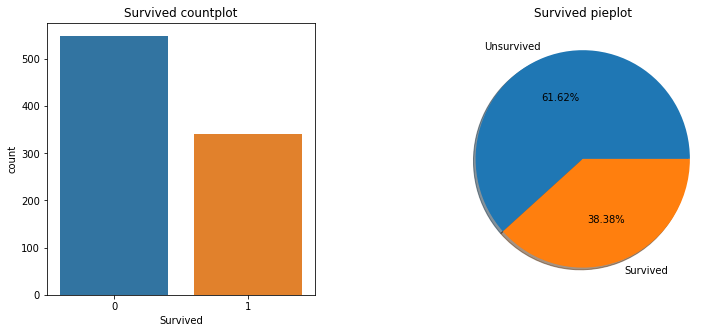

In [13]:
# y_data
plt.figure(figsize=(12, 5))
subplots_adjust(wspace = 0.5)


df = pd.DataFrame([len(train[train['Survived'] == 0])/len(train), 
                   len(train[train['Survived'] == 1])/len(train)], 
                   index=['Unsurvived', 'Survived'], columns=['x'])

# countplot
plt.subplot(1, 2, 1)
sns.countplot(x = 'Survived', data = train)
plt.title('Survived countplot')
labels = 'Unsurvived', 'Survived'

# pieplot
plt.subplot(1, 2, 2)
plt.pie(df, labels = labels, autopct='%1.2f%%', shadow = True, explode = (0.0, 0.0))
plt.title('Survived pieplot')

plt.show()

### 4. X & Y data

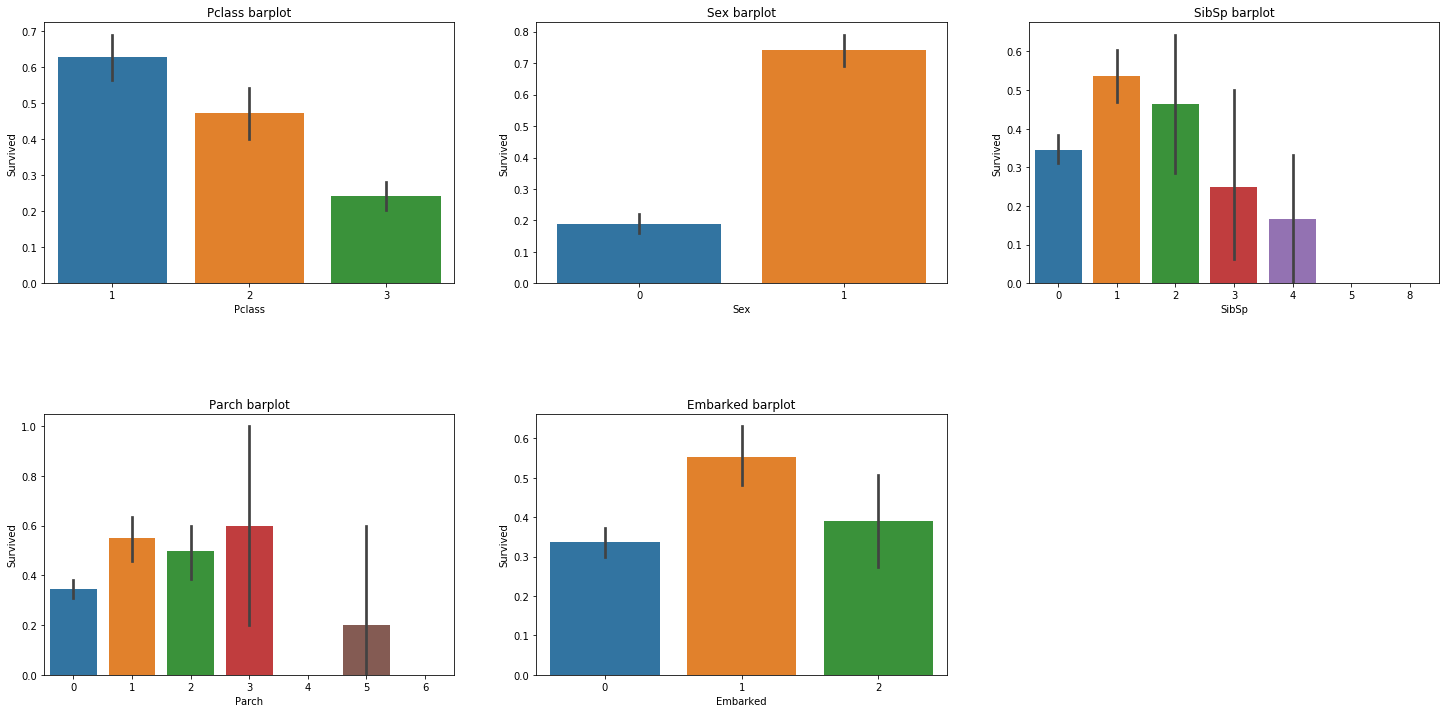

In [14]:
# category barplot
category = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

plt.figure(figsize=(25, 12))
subplots_adjust(hspace = 0.5)

for i in range(5):
    plt.subplot(2, 3, i+1)
    sns.barplot(x = train[category[i]], y = train['Survived'])
    plt.title('{} barplot'.format(train[category].columns[i]))

#### Comments :

- Pclass를 보면 등급이 높을수록 생존률이 높다는 것을 알 수 있습니다.
- Sex를 보면 여성일수록 생존률이 높다는 것을 알 수 있습니다.
- SibSp은 1부터 점차적으로 감소하는 형태를 볼 수 있습니다.
- Parch는 특별한 규칙성을 보이진 않습니다.
- Embarked는 C-Q-S별로 생존률이 높다는 것을 알 수 있습니다.

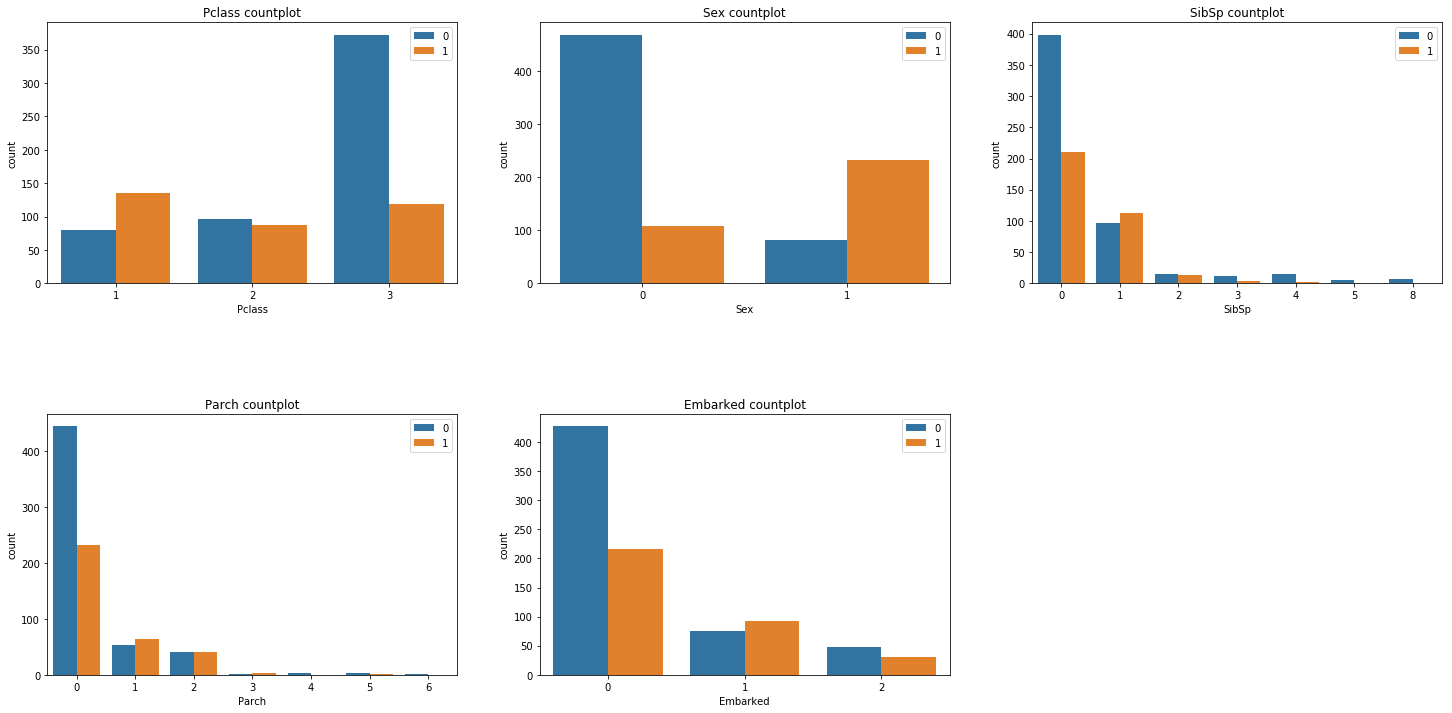

In [15]:
# category countplot
plt.figure(figsize=(25, 12))
subplots_adjust(hspace = 0.5)

for i in range(5):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=train[category[i]], hue = 'Survived',  data = train)
    plt.legend(loc = 1)
    plt.title('{} countplot'.format(train[category].columns[i]))

#### Commnets :

- Pclass의 경우 클래스가 높을수록 생존률이 높은것으로 확인됩니다.
- Sex의 경우 여성이 생존률이 월등히 높습니다.
- SibSp의 경우 형재자매나 배우자의 수가 1명일 경우가 제일 생존수가 높습니다.
- Parch는 0일때 생존하지 못하는 수가 많습니다.
- Embarked는 C구역에서 승선할 경우 생존률이 높습니다.

In [16]:
# cabin
cabin = train.groupby("Cabin").size().reset_index(name='counts')
cabin = cabin.sort_values(by=['counts'], ascending=False)
cabin = cabin.reset_index(drop=True)
cabin.head(10)

,Cabin,counts
0,C23 C25 C27,4
1,G6,4
2,B96 B98,4
3,F2,3
4,C22 C26,3
5,E101,3
6,F33,3
7,D,3
8,C78,2
9,B57 B59 B63 B66,2


#### comments :

- 카테고리 갯수가 많고 그 수가 차이가 별로 없어서 분류에 적합한 컬럼인지 고민할 필요가 있음

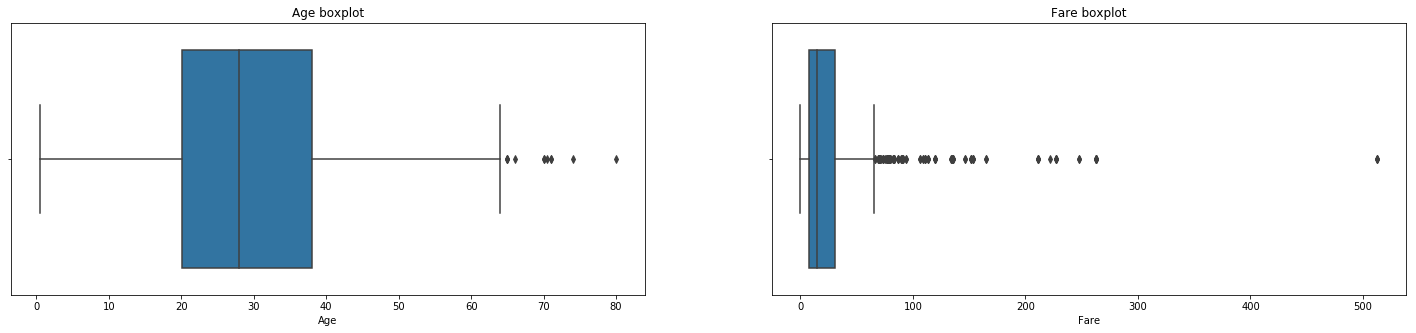

In [17]:
# continuos boxplot
continuos = ['Age', 'Fare']

plt.figure(figsize=(25, 5))

for i in range(2):
    plt.subplot(1, 2, i+1)
    sns.boxplot(x = train[continuos[i]])
    plt.title('{} boxplot'.format(train[continuos].columns[i]))

#### comments :

- age는 약 68세 이상부터 이상치를 나타냄
- fare는 편차가 많아 어느정도 이상치를 제거해야할것으로 보임

### 5. GroupBy 

In [18]:
# Pclass
train.groupby('Pclass').count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214
2,184,184,184,184,173,184,184,184,184,16,184
3,491,491,491,491,355,491,491,491,491,12,491


In [19]:
# Sex
train.groupby('Sex').count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
0,577,577,577,577,453,577,577,577,577,107,577
1,314,314,314,314,261,314,314,314,314,97,312


In [20]:
# SibSp
train.groupby('SibSp').count()

,PassengerId,Survived,Pclass,Name,Sex,Age,Parch,Ticket,Fare,Cabin,Embarked
SibSp,,,,,,,,,,,
0,608,608,608,608,608,471,608,608,608,126,606
1,209,209,209,209,209,183,209,209,209,69,209
2,28,28,28,28,28,25,28,28,28,6,28
3,16,16,16,16,16,12,16,16,16,3,16
4,18,18,18,18,18,18,18,18,18,0,18
5,5,5,5,5,5,5,5,5,5,0,5
8,7,7,7,7,7,0,7,7,7,0,7


In [21]:
# Parch
train.groupby('Parch').count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Ticket,Fare,Cabin,Embarked
Parch,,,,,,,,,,,
0,678,678,678,678,678,521,678,678,678,141,676
1,118,118,118,118,118,110,118,118,118,39,118
2,80,80,80,80,80,68,80,80,80,23,80
3,5,5,5,5,5,5,5,5,5,0,5
4,4,4,4,4,4,4,4,4,4,1,4
5,5,5,5,5,5,5,5,5,5,0,5
6,1,1,1,1,1,1,1,1,1,0,1


In [22]:
# Embarked
train.groupby('Embarked').count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
Embarked,,,,,,,,,,,
0,644,644,644,644,644,554,644,644,644,644,129
1,168,168,168,168,168,130,168,168,168,168,69
2,77,77,77,77,77,28,77,77,77,77,4


### 6. Correlation

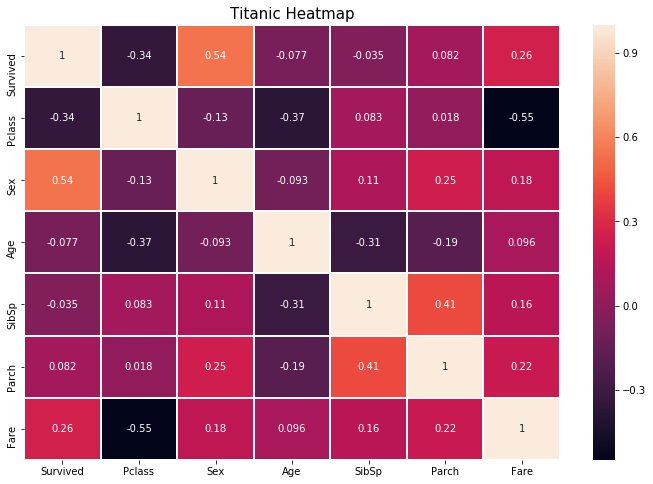

In [23]:
# correlation
correlation = train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)

f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(correlation.corr(), annot=True, linewidths=1)
plt.title('Titanic Heatmap', fontsize = 15)
plt.show()